In [1]:
import numpy as np

In [42]:
rng = np.random.RandomState(43)

In [43]:
x = np.arange(10)
y = rng.uniform(size=10) + 3
y

array([3.11505457, 3.60906654, 3.13339096, 3.24058962, 3.32713906,
       3.85913749, 3.66609021, 3.54116221, 3.02901382, 3.7337483 ])

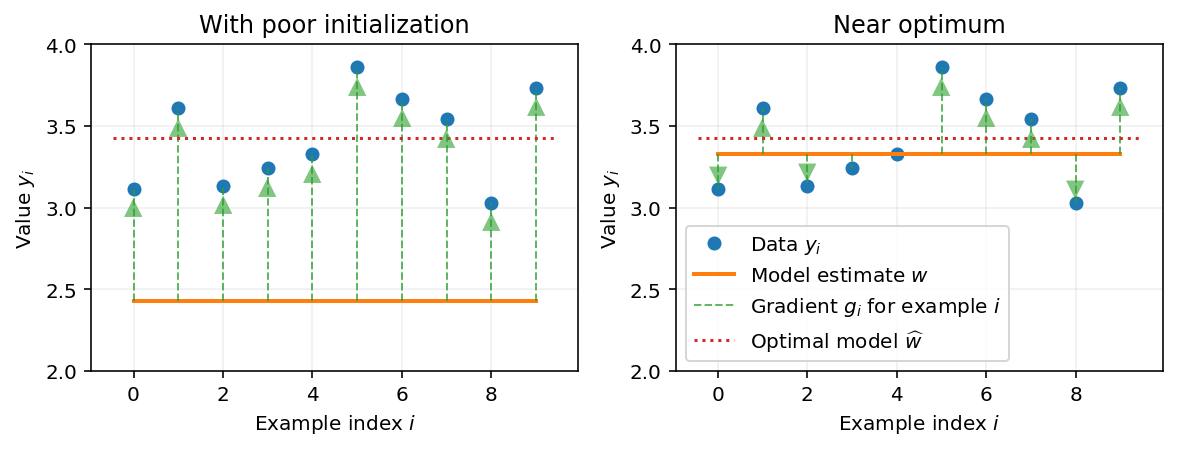

In [137]:
import matplotlib.pyplot as plt

def plot(ax, x, y, diff, legend=True):
    ax.plot(x, y, "C0o", label="Data $y_i$")
    x_hat = y.mean() - diff
    ax.plot(x, [x_hat] * len(x), "C1-", label="Model estimate $w$", linewidth=2)
    for xi, yi in zip(x, y):
        ax.plot([xi, xi], [x_hat, yi], "C2--", label="Gradient $g_i$ for example $i$" if xi == 0 else None, linewidth=1.0, alpha=0.75)
        if x_hat < yi - 0.15:
            ax.text(xi - 0.21, yi - 0.15, "▲", fontsize=12, color="C2", alpha=0.6)
        elif yi + 0.15 < x_hat:
            ax.text(xi-0.21, yi + 0.05, "▼", fontsize=12, color="C2", alpha=0.6)
    # 
    ax.set_ylim(2, 4)
    ax.plot(ax.get_xlim(), [y.mean(), y.mean()], "C3:", label="Optimal model $\widehat{w}$")
    ax.set_xlabel("Example index $i$")
    ax.set_ylabel("Value $y_i$")
    ax.grid(alpha=0.2)
    ax.yaxis.set_major_locator(plt.MaxNLocator(4))
    if legend:
        ax.legend(loc="best")
    return ax

w = 3
fig, axs = plt.subplots(ncols=2, figsize=(3.2 * w, w))
axs[0] = plot(axs[0], x, y, 1, legend=False)
axs[0].set_title("With poor initialization")
axs[1] = plot(axs[1], x, y, 0.1)
axs[1].set_title("Near optimum")
plt.savefig("grad-div.svg", bbox_inches="tight")